# Estimation of Precise number of Room Occupants using Machine learning Classification Techniques

In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Collection

In [2]:
# Load the data
room_data = pd.read_csv('Occupancy_Estimation.csv')
# The dataset is gotten from the UCL Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation
room_data.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  22/12/2017  10:49:41    24.94    24.75    24.56    25.38       121   
1  22/12/2017  10:50:12    24.94    24.75    24.56    25.44       121   
2  22/12/2017  10:50:42    25.00    24.75    24.50    25.44       121   
3  22/12/2017  10:51:13    25.00    24.75    24.56    25.44       121   
4  22/12/2017  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

In [3]:
# To get the column names and information about the dataset:
print(room_data.columns)
print(room_data.shape)

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')
(10129, 19)


In [4]:
room_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [5]:
room_data.describe(include='all')

Date      Time       S1_Temp       S2_Temp       S3_Temp  \
count        10129     10129  10129.000000  10129.000000  10129.000000   
unique           7     10129           NaN           NaN           NaN   
top     23/12/2017  10:49:41           NaN           NaN           NaN   
freq          2779         1           NaN           NaN           NaN   
mean           NaN       NaN     25.454006     25.546059     25.056621   
std            NaN       NaN      0.351358      0.586325      0.427283   
min            NaN       NaN     24.940000     24.750000     24.440000   
25%            NaN       NaN     25.190000     25.190000     24.690000   
50%            NaN       NaN     25.380000     25.380000     24.940000   
75%            NaN       NaN     25.630000     25.630000     25.380000   
max            NaN       NaN     26.380000     29.000000     26.190000   

             S4_Temp      S1_Light     S2_Light      S3_Light      S4_Light  \
count   10129.000000  10129.000000  10129.00000  10129.000000  10129.000000   
unique           NaN           NaN          NaN           NaN           NaN   
top              NaN           NaN          NaN           NaN           NaN   
freq             NaN           NaN          NaN           NaN           NaN   
mean       25.754125     25.445059     26.01629     34.248494     13.220259   
std         0.356434     51.011264     67.30417     58.400744     19.602219   
min        24.940000      0.000000      0.00000      0.000000      0.000000   
25%        25.440000      0.000000      0.00000      0.000000      0.000000   
50%        25.750000      0.000000      0.00000      0.000000      0.000000   
75%        26.000000     12.000000     14.00000     50.000000     22.000000   
max        26.560000    165.000000    258.00000    280.000000     74.000000   

            S1_Sound      S2_Sound      S3_Sound      S4_Sound        S5_CO2  \
count   10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.168178      0.120066      0.158119      0.103840    460.860401   
std         0.316709      0.266503      0.413637      0.120683    199.964940   
min         0.060000      0.040000      0.040000      0.050000    345.000000   
25%         0.070000      0.050000      0.060000      0.060000    355.000000   
50%         0.080000      0.050000      0.060000      0.080000    360.000000   
75%         0.080000      0.060000      0.070000      0.100000    465.000000   
max         3.880000      3.440000      3.670000      3.400000   1270.000000   

        S5_CO2_Slope        S6_PIR        S7_PIR  Room_Occupancy_Count  
count   10129.000000  10129.000000  10129.000000          10129.000000  
unique           NaN           NaN           NaN                   NaN  
top              NaN           NaN           NaN                   NaN  
freq             NaN           NaN           NaN                   NaN  
mean       -0.004830      0.090137      0.079574              0.398559  
std         1.164990      0.286392      0.270645              0.893633  
min        -6.296154      0.000000      0.000000              0.000000  
25%        -0.046154      0.000000      0.000000              0.000000  
50%         0.000000      0.000000      0.000000              0.000000  
75%         0.000000      0.000000      0.000000              0.000000  
max         8.980769      1.000000      1.000000              3.000000

In [6]:
# The 'Date' and 'Time' columns were recorded to show the different measurements taken for a period of time.
# However, these columns are not necessirily required for this procedures, hence we drop the date and time columns.
# Also, the 'S5_CO2_Slope' values are out of range and the feature is not directly necessary to estimate the outcome

# To drop the 'Date', 'Time' and 'S5_CO2_Slope' columns and get the statistical values of the data:
data=room_data.drop(['Date', 'Time', 'S5_CO2_Slope'], axis =1)
data.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454006     25.546059     25.056621     25.754125     25.445059   
std        0.351358      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2        S6_PIR        S7_PIR  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean       0.158119      0.103840    460.860401      0.090137      0.079574   
std        0.413637      0.120683    199.964940      0.286392      0.270645   
min        0.040000      0.050000    345.000000      0.000000      0.000000   
25%        0.060000      0.060000    355.000000      0.000000      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      1.000000      1.000000   

       Room_Occupancy_Count  
count          10129.000000  
mean               0.398559  
std                0.893633  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                3.000000

The original datset includes can be categorized into the Features variable and the Target variable


In [7]:
# The feature variables are:
Ndata = data.drop('Room_Occupancy_Count', axis = 1)
# The target variable is:
data['Room_Occupancy_Count']
# To get the statistal values of the numerical variables:
Ndata.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454006     25.546059     25.056621     25.754125     25.445059   
std        0.351358      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2        S6_PIR        S7_PIR  
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000  
mean       0.158119      0.103840    460.860401      0.090137      0.079574  
std        0.413637      0.120683    199.964940      0.286392      0.270645  
min        0.040000      0.050000    345.000000      0.000000      0.000000  
25%        0.060000      0.060000    355.000000      0.000000      0.000000  
50%        0.060000      0.080000    360.000000      0.000000      0.000000  
75%        0.070000      0.100000    465.000000      0.000000      0.000000  
max        3.670000      3.400000   1270.000000      1.000000      1.000000

# Data Visualization

A pairplot is plotted to give a visual summary of the distribution of patterns in the feature avariable and their 
relationship with the target variable.

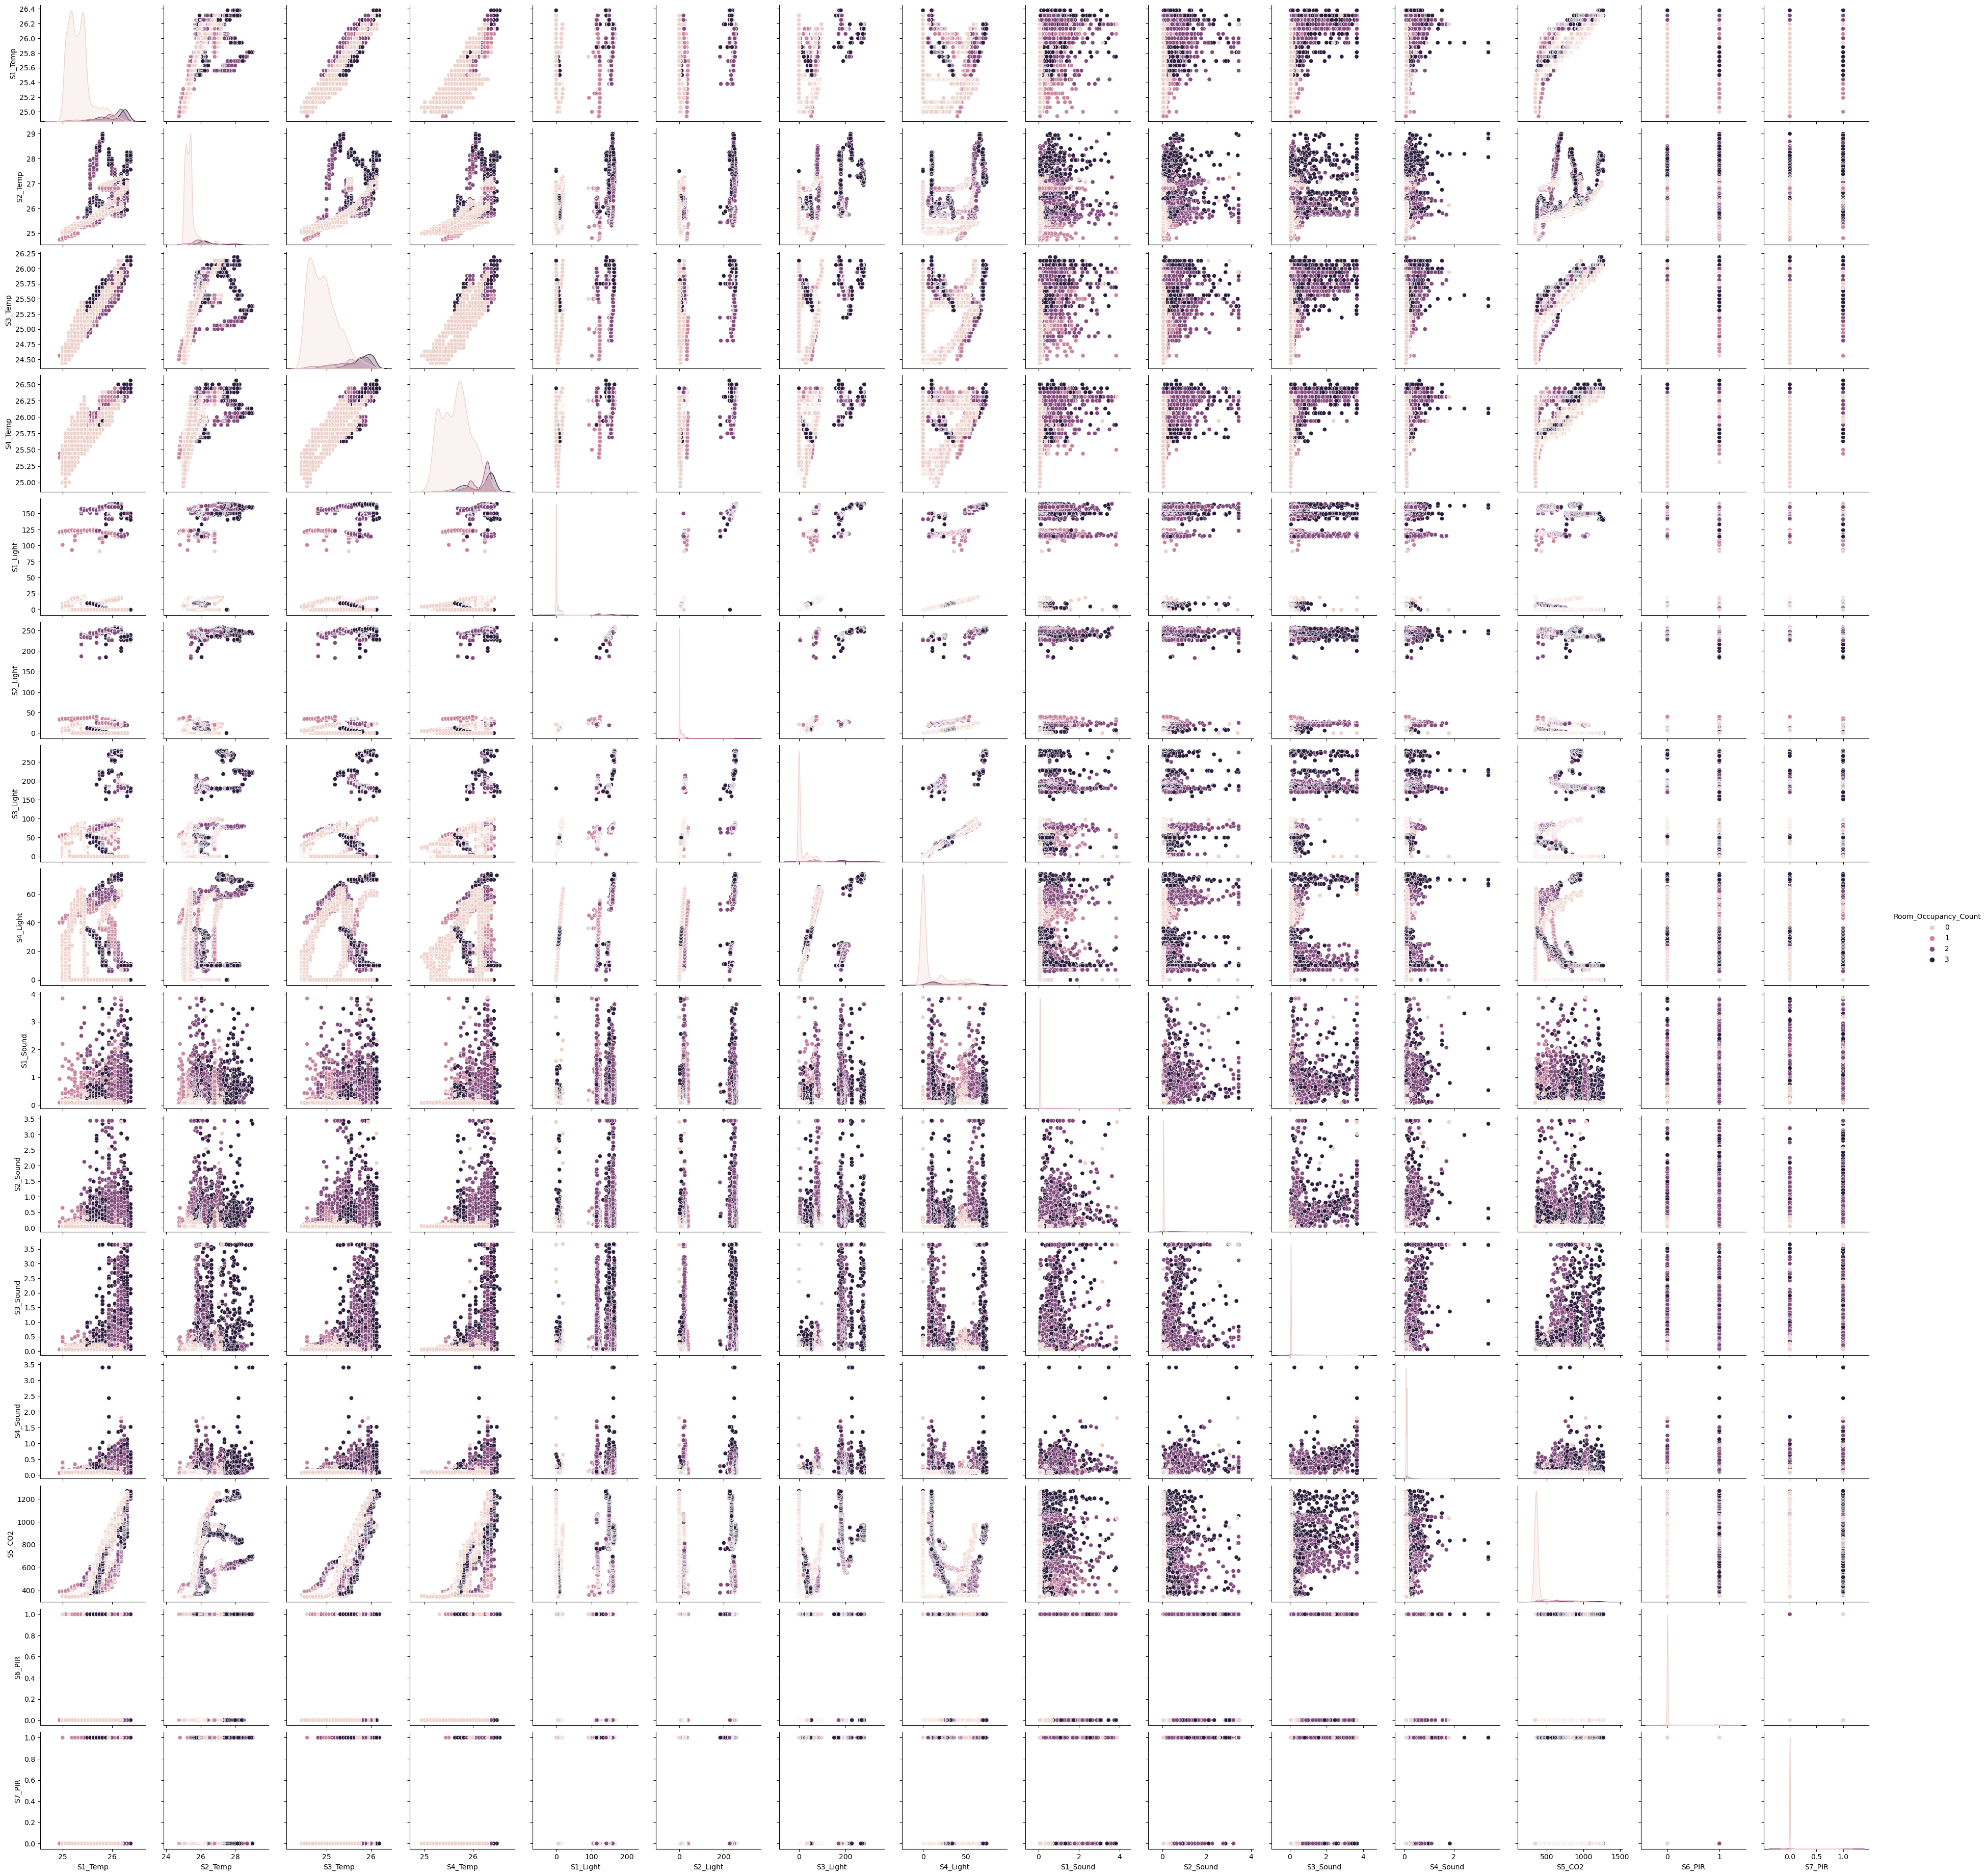

In [8]:
sns.pairplot(data, diag_kind='kde', hue = 'Room_Occupancy_Count')

To analyze and visualize the distribution feature variables, I perform some exploratory data analysis using subplots.

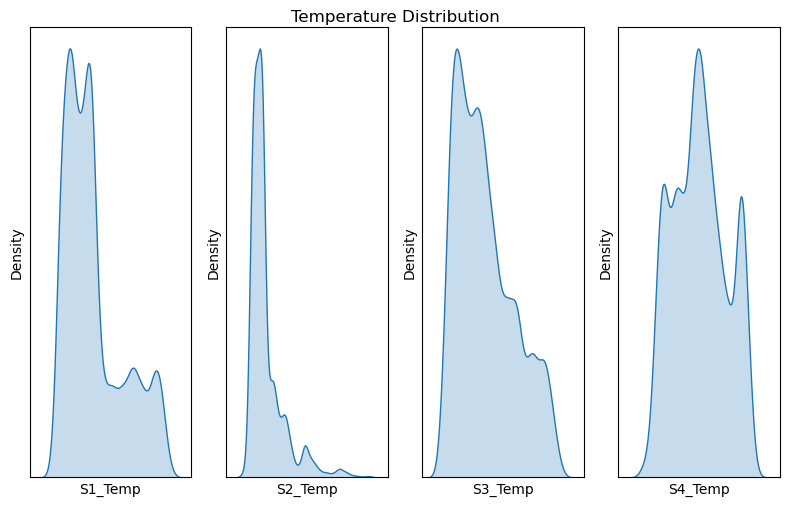

In [9]:
fig, ax = plt.subplots(1,4, figsize = (8,5))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = Ndata,
               ax = axis,
               x = f"S{index + 1}_Temp",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"S{index + 1}_Temp")
fig.tight_layout()
plt.suptitle("Temperature Distribution",va = 'baseline')
plt.show()

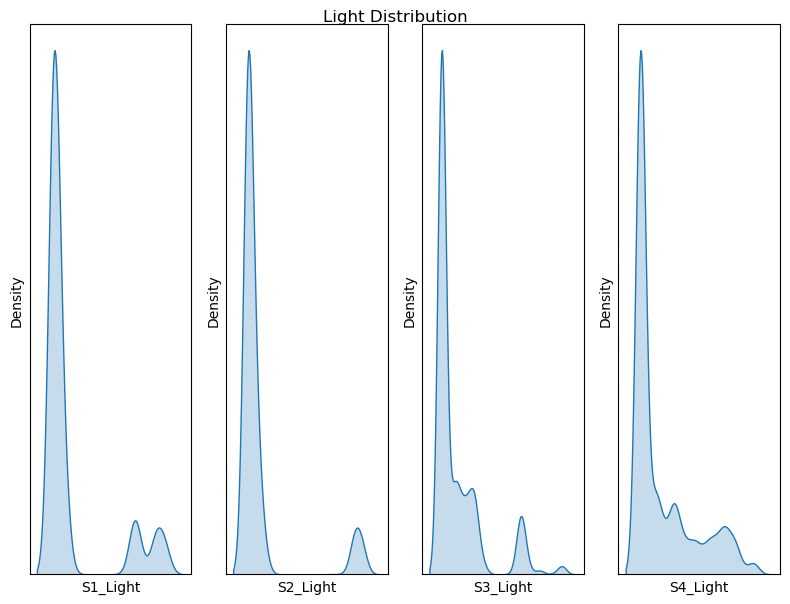

In [10]:
fig, ax = plt.subplots(1,4, figsize = (8,6))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = Ndata,
               ax = axis,
               x = f"S{index + 1}_Light",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"S{index + 1}_Light")
fig.tight_layout()
plt.suptitle("Light Distribution",va = 'baseline')
plt.show()

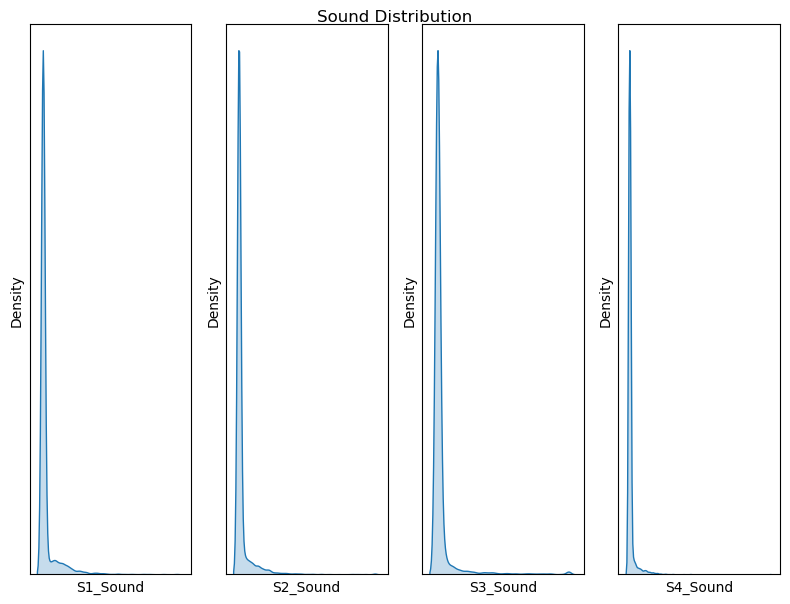

In [11]:
fig, ax = plt.subplots(1,4, figsize = (8,6))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = Ndata,
               ax = axis,
               x = f"S{index + 1}_Sound",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"S{index + 1}_Sound")
fig.tight_layout()
plt.suptitle("Sound Distribution",va = 'baseline')
plt.show()

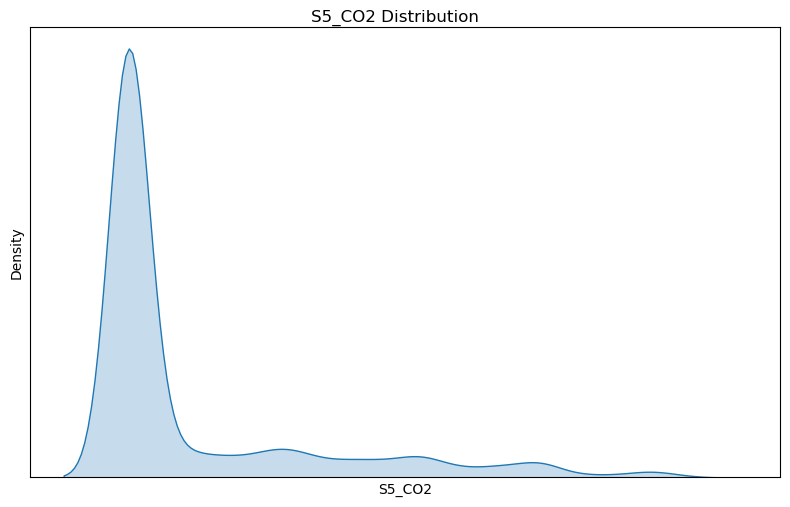

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

axis = sns.kdeplot(data=Ndata,
ax=ax,
x="S5_CO2",
fill=True
)
axis.set_xticks([])
axis.set_yticks([])
axis.set_xlabel("S5_CO2")
fig.tight_layout()
plt.suptitle("S5_CO2 Distribution", va='baseline')
plt.show()

From these plots, the dataset appears to be positively skewed as the most of the curve is in the postive direction.

# Data Preparation

Check Missing Values

In [13]:
# Check for any missing values in the dataset
Ndata.isnull().sum()

S1_Temp     0
S2_Temp     0
S3_Temp     0
S4_Temp     0
S1_Light    0
S2_Light    0
S3_Light    0
S4_Light    0
S1_Sound    0
S2_Sound    0
S3_Sound    0
S4_Sound    0
S5_CO2      0
S6_PIR      0
S7_PIR      0
dtype: int64

Check for Outliers

<Axes: >

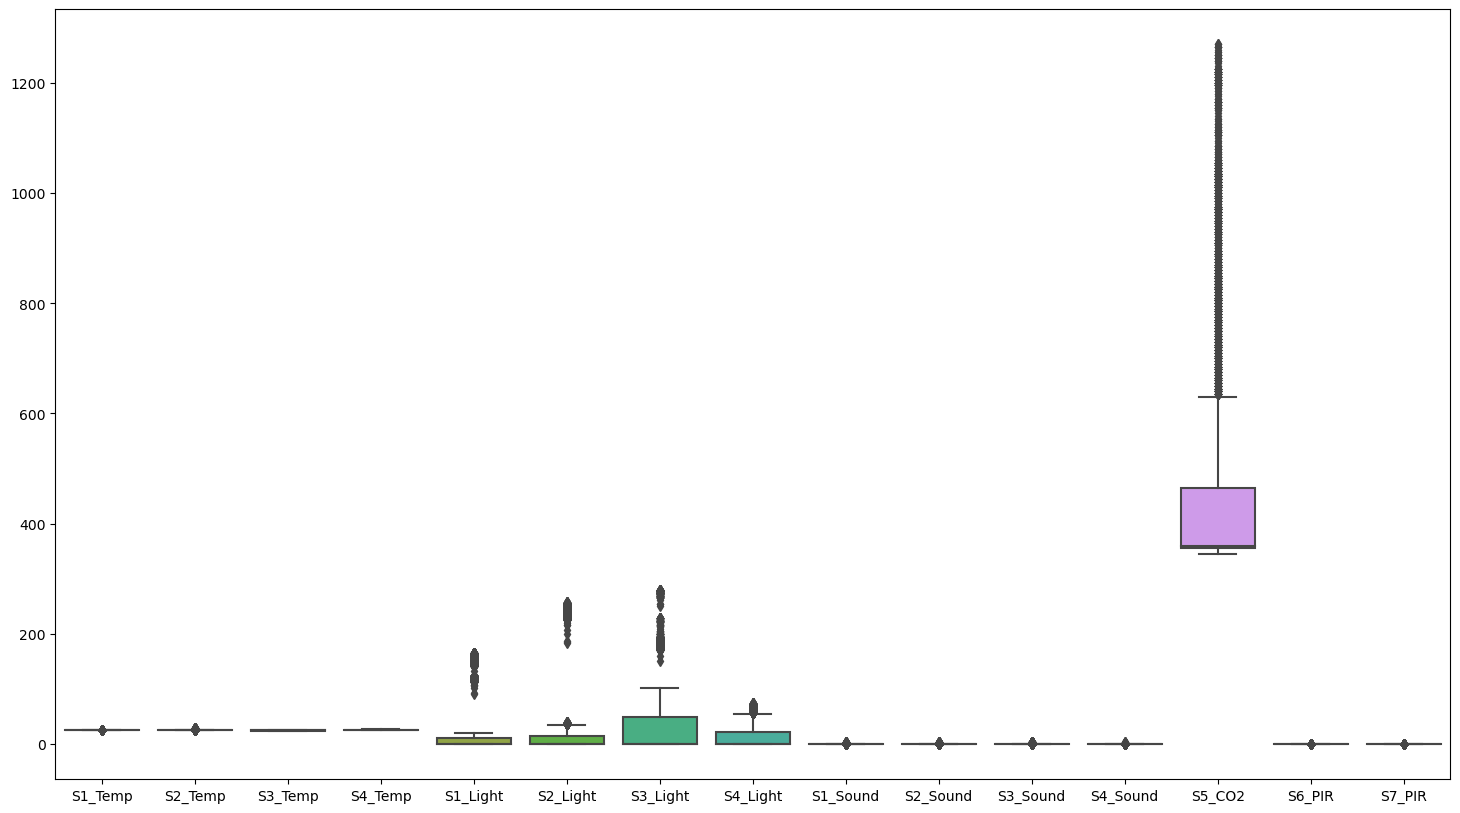

In [14]:
# Plot a boxplot to check the outliers of the numerical(feature) variables:
plt.figure(figsize= (18,10))
sns.boxplot(data=Ndata,orient="v")

From the boxplot, notable outliers can be seen in the S1_Light to S4_Light Variables, 
and a very significant amount of outliers can be seen in the S5_CO2 Variables.

Hence, I will examine the outliers in each of these features.

In [15]:
# Identifying the outliers using the Interquantile Range (IQR) method
sorted(Ndata)

['S1_Light',
 'S1_Sound',
 'S1_Temp',
 'S2_Light',
 'S2_Sound',
 'S2_Temp',
 'S3_Light',
 'S3_Sound',
 'S3_Temp',
 'S4_Light',
 'S4_Sound',
 'S4_Temp',
 'S5_CO2',
 'S6_PIR',
 'S7_PIR']

In [16]:
quantile1, quantile3= np.percentile(Ndata,[25,75])
print(quantile1,quantile3)

0.0 25.44


In [17]:
# To calculate the IQR:
iqr_value=quantile3-quantile1
print(iqr_value)

25.44


In [18]:
# To find the lower bound value and the higher bound value:
lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value)
print(lower_bound_val,upper_bound_val)

-38.160000000000004 63.60000000000001


In [19]:
# To calculate the exact number of outliers for each variable:
outliers = ((Ndata < lower_bound_val) | (Ndata > upper_bound_val)).sum()
print("Total Number of Outliers:")
print(outliers)
print("Shape Before Removing Outliers:", Ndata.shape)

Total Number of Outliers:
S1_Temp         0
S2_Temp         0
S3_Temp         0
S4_Temp         0
S1_Light     1716
S2_Light      895
S3_Light     2033
S4_Light      159
S1_Sound        0
S2_Sound        0
S3_Sound        0
S4_Sound        0
S5_CO2      10129
S6_PIR          0
S7_PIR          0
dtype: int64
Shape Before Removing Outliers: (10129, 15)


The summary above confirms the representation seen in the boxplot. 
It further gives the exact sum of the outliers for each of the variable.

# Dealing with the outliers

As a result of the significant number of outliers in the Light and S5_CO2 features, removing them totally is not advisable. 
Therefore, another suitable method will be using the Interquantile range (IQR) method, 
where we replace all the values that are less or above the limits and replace them with lower and upper limit accordingly.

I will do this for each of the features with notable outliers.

In [20]:
def detect_outliers_IQR(df):
   #Calculate the Q1:
   Q1 = np.percentile(df, 25)
   #Calculate the Q3:
   Q3 = np.percentile(df, 75)
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(df >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(df <= (Q1-1.5*IQR))
   #Outliers
   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
   return outliers, upper, lower

S1_Light

Number of Outliers: 1716
Maximum Outlier Value: 165
Minimum Outlier Value: 91
Percentage of Outliers: 16.94145522756442
Boxplot before removing Outliers:


<Axes: >

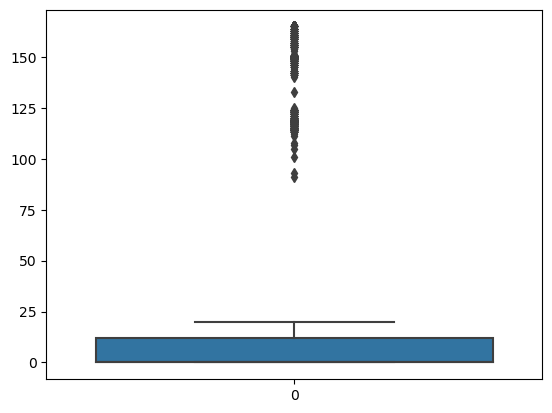

In [21]:
# First, examine the outlier values:
outliers, upper, lower = detect_outliers_IQR(Ndata['S1_Light'])
print("Number of Outliers: "+ str(len(outliers)))
print("Maximum Outlier Value: "+ str(outliers.max()))
print("Minimum Outlier Value: "+ str(outliers.min()))
print("Percentage of Outliers: "+ str(len(outliers)/len(Ndata) * 100))

print("Boxplot before removing Outliers:")
sns.boxplot(Ndata['S1_Light'],orient='v')

0.0 12.0
12.0
-18.0 30.0
Boxplot After Removing Outliers:


<Axes: >

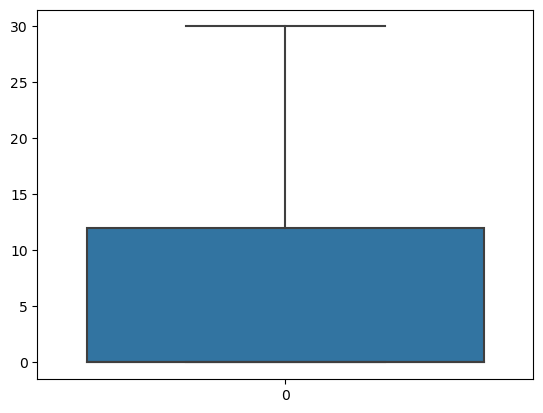

In [22]:
# To deal with the Outliers:
Q1 = Ndata.S1_Light.quantile(0.25)
Q3 = Ndata.S1_Light.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
Ndata['S1_Light'] = np.where(Ndata['S1_Light']>upper_limit,upper_limit,Ndata['S1_Light'])
Ndata['S1_Light'] = np.where(Ndata['S1_Light']<lower_limit,lower_limit,Ndata['S1_Light'])

print("Boxplot After Removing Outliers:")
sns.boxplot(Ndata['S1_Light'],orient='v')

S2_Light

Number of Outliers: 1017
Maximum Outlier Value: 258
Minimum Outlier Value: 36
Percentage of Outliers: 10.040477835916676
Boxplot before removing Outliers:


<Axes: >

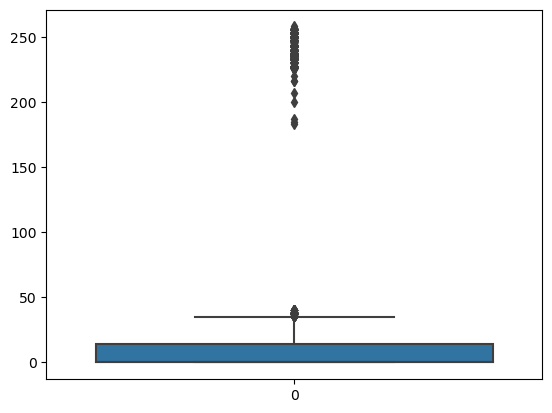

In [23]:
# First, examine the outlier values:
outliers, upper, lower = detect_outliers_IQR(Ndata['S2_Light'])
print("Number of Outliers: "+ str(len(outliers)))
print("Maximum Outlier Value: "+ str(outliers.max()))
print("Minimum Outlier Value: "+ str(outliers.min()))
print("Percentage of Outliers: "+ str(len(outliers)/len(Ndata) * 100))

print("Boxplot before removing Outliers:")
sns.boxplot(Ndata['S2_Light'],orient='v')

0.0 14.0
14.0
-21.0 35.0
Boxplot After Removing Outliers:


<Axes: >

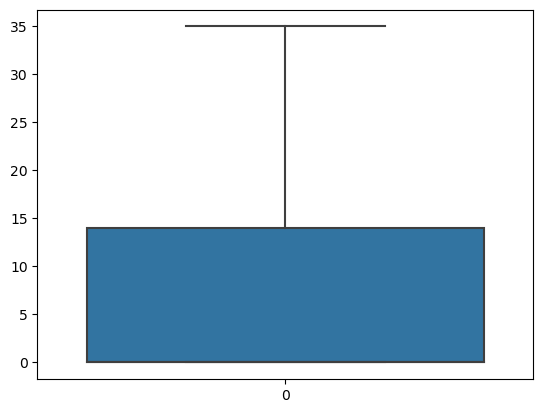

In [24]:
# To deal with the Outliers:
Q1 = Ndata.S2_Light.quantile(0.25)
Q3 = Ndata.S2_Light.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
Ndata['S2_Light'] = np.where(Ndata['S2_Light']>upper_limit,upper_limit,Ndata['S2_Light'])
Ndata['S2_Light'] = np.where(Ndata['S2_Light']<lower_limit,lower_limit,Ndata['S2_Light'])

print("Boxplot After Removing Outliers:")
sns.boxplot(Ndata['S2_Light'],orient='v')

S3_Light

Number of Outliers: 950
Maximum Outlier Value: 280
Minimum Outlier Value: 151
Percentage of Outliers: 9.37901076118077
Boxplot before removing Outliers:


<Axes: >

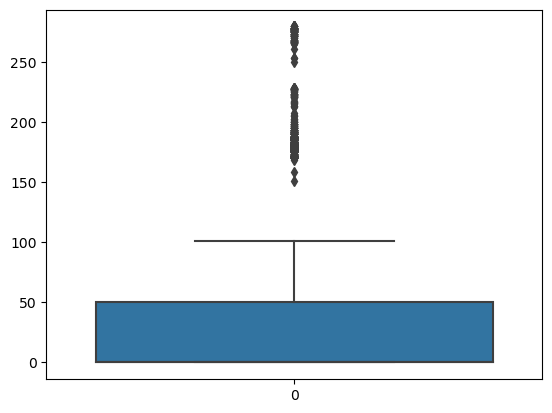

In [25]:
# First, examine the outlier values:
outliers, upper, lower = detect_outliers_IQR(Ndata['S3_Light'])
print("Number of Outliers: "+ str(len(outliers)))
print("Maximum Outlier Value: "+ str(outliers.max()))
print("Minimum Outlier Value: "+ str(outliers.min()))
print("Percentage of Outliers: "+ str(len(outliers)/len(Ndata) * 100))

print("Boxplot before removing Outliers:")
sns.boxplot(Ndata['S3_Light'],orient='v')

0.0 50.0
50.0
-75.0 125.0
Boxplot After Removing Outliers:


<Axes: >

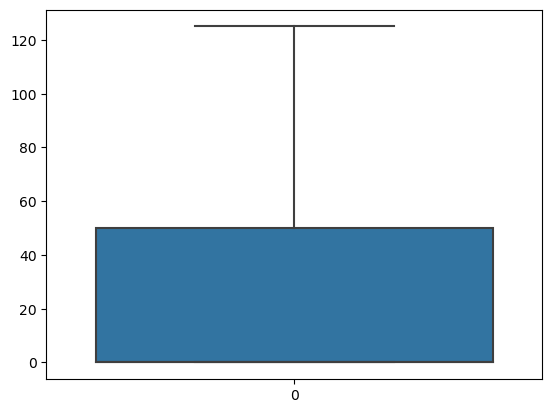

In [26]:
# To deal with the Outliers:
Q1 = Ndata.S3_Light.quantile(0.25)
Q3 = Ndata.S3_Light.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
Ndata['S3_Light'] = np.where(Ndata['S3_Light']>upper_limit,upper_limit,Ndata['S3_Light'])
Ndata['S3_Light'] = np.where(Ndata['S3_Light']<lower_limit,lower_limit,Ndata['S3_Light'])

print("Boxplot After Removing Outliers:")
sns.boxplot(Ndata['S3_Light'],orient='v')

S4_Light

Number of Outliers: 543
Maximum Outlier Value: 74
Minimum Outlier Value: 56
Percentage of Outliers: 5.360845098232797
Boxplot before removing Outliers:


<Axes: >

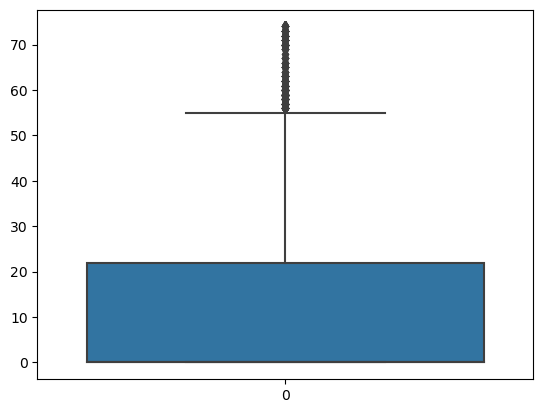

In [27]:
# First, examine the outlier values:
outliers, upper, lower = detect_outliers_IQR(Ndata['S4_Light'])
print("Number of Outliers: "+ str(len(outliers)))
print("Maximum Outlier Value: "+ str(outliers.max()))
print("Minimum Outlier Value: "+ str(outliers.min()))
print("Percentage of Outliers: "+ str(len(outliers)/len(Ndata) * 100))

print("Boxplot before removing Outliers:")
sns.boxplot(Ndata['S4_Light'],orient='v')

0.0 22.0
22.0
-33.0 55.0
Boxplot before removing Outliers:


<Axes: >

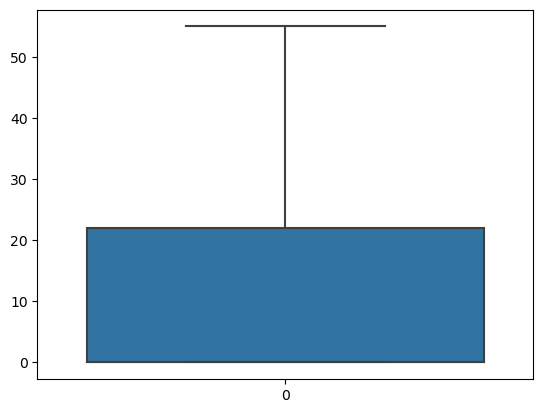

In [28]:
# To deal with the Outliers:
Q1 = Ndata.S4_Light.quantile(0.25)
Q3 = Ndata.S4_Light.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
Ndata['S4_Light'] = np.where(Ndata['S4_Light']>upper_limit,upper_limit,Ndata['S4_Light'])
Ndata['S4_Light'] = np.where(Ndata['S4_Light']<lower_limit,lower_limit,Ndata['S4_Light'])

print("Boxplot before removing Outliers:")
sns.boxplot(Ndata['S4_Light'],orient='v')

S5_CO2

Number of Outliers: 1657
Maximum Outlier Value: 1270
Minimum Outlier Value: 635
Percentage of Outliers: 16.35896929608056
Boxplot before removing Outliers:


<Axes: >

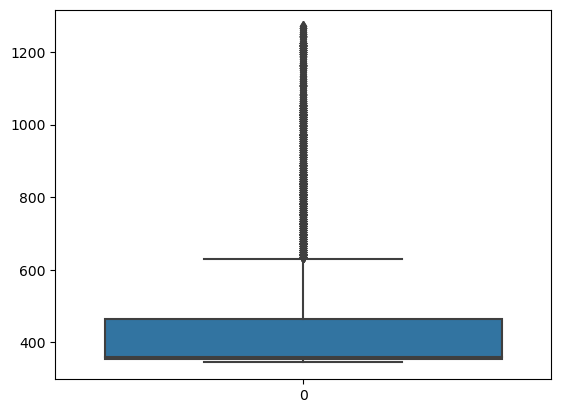

In [29]:
# First, examine the outlier values:
outliers, upper, lower = detect_outliers_IQR(Ndata['S5_CO2'])
print("Number of Outliers: "+ str(len(outliers)))
print("Maximum Outlier Value: "+ str(outliers.max()))
print("Minimum Outlier Value: "+ str(outliers.min()))
print("Percentage of Outliers: "+ str(len(outliers)/len(Ndata) * 100))

print("Boxplot before removing Outliers:")
sns.boxplot(Ndata['S5_CO2'],orient='v')

355.0 465.0
110.0
190.0 630.0
Boxplot before removing Outliers:


<Axes: >

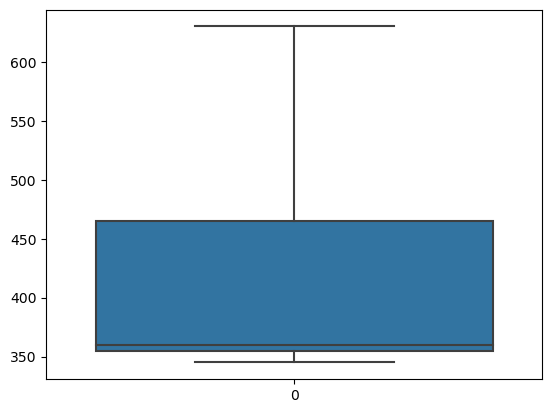

In [30]:
# To deal with the Outliers:
Q1 = Ndata.S5_CO2.quantile(0.25)
Q3 = Ndata.S5_CO2.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
Ndata['S5_CO2'] = np.where(Ndata['S5_CO2']>upper_limit,upper_limit,Ndata['S5_CO2'])
Ndata['S5_CO2'] = np.where(Ndata['S5_CO2']<lower_limit,lower_limit,Ndata['S5_CO2'])

print("Boxplot before removing Outliers:")
sns.boxplot(Ndata['S5_CO2'],orient='v')

In [31]:
# After removing and replacing the outliers, we examine the total number of outliers for all the numerical features in the dataset:
outliers = ((Ndata < lower_bound_val) | (Ndata > upper_bound_val)).sum()
print("Total Number of Outliers:")
print(outliers)
print("Shape After Removing Outliers:", Ndata.shape)

Total Number of Outliers:
S1_Temp         0
S2_Temp         0
S3_Temp         0
S4_Temp         0
S1_Light        0
S2_Light        0
S3_Light     2033
S4_Light        0
S1_Sound        0
S2_Sound        0
S3_Sound        0
S4_Sound        0
S5_CO2      10129
S6_PIR          0
S7_PIR          0
dtype: int64
Shape After Removing Outliers: (10129, 15)


The outliers have been reduced significantly in most of the affected features. 
However, since there are still two features with outliers, 
I will examine this later and hence will be adapting suitable machine learning models that are not
very sensitive to outliers.

# Data Scaling (Transformation)

In [41]:
# To perform PCA, first scale the dataset:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Ndata = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S6_PIR', 'S7_PIR',]

# Correlation Analysis

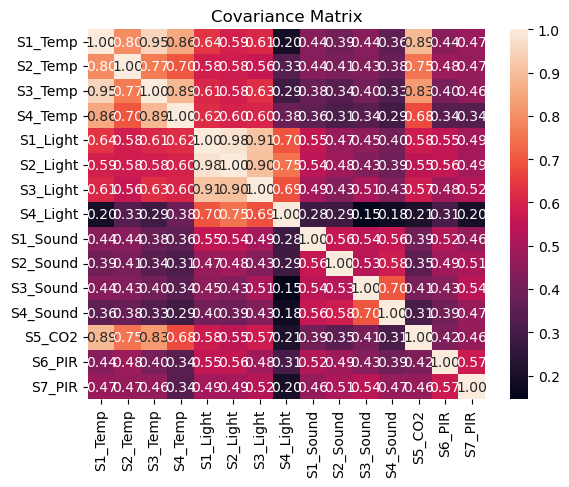

In [33]:
# Then,calculate the mean and standard deviation of numerical data:

# Mean
Ndata_mean = Ndata.mean()
 
# Standard deviation
Ndata_std = Ndata.std()
 
# Standardization
Z = (Ndata - Ndata_mean) / Ndata_std

# covariance
c = Z.cov()

# Plot the covariance matrix
ax = sns.heatmap(c, annot=True, fmt=".2f")
plt.title('Covariance Matrix')
plt.show()

Using Pearson Correlation Method

<Axes: >

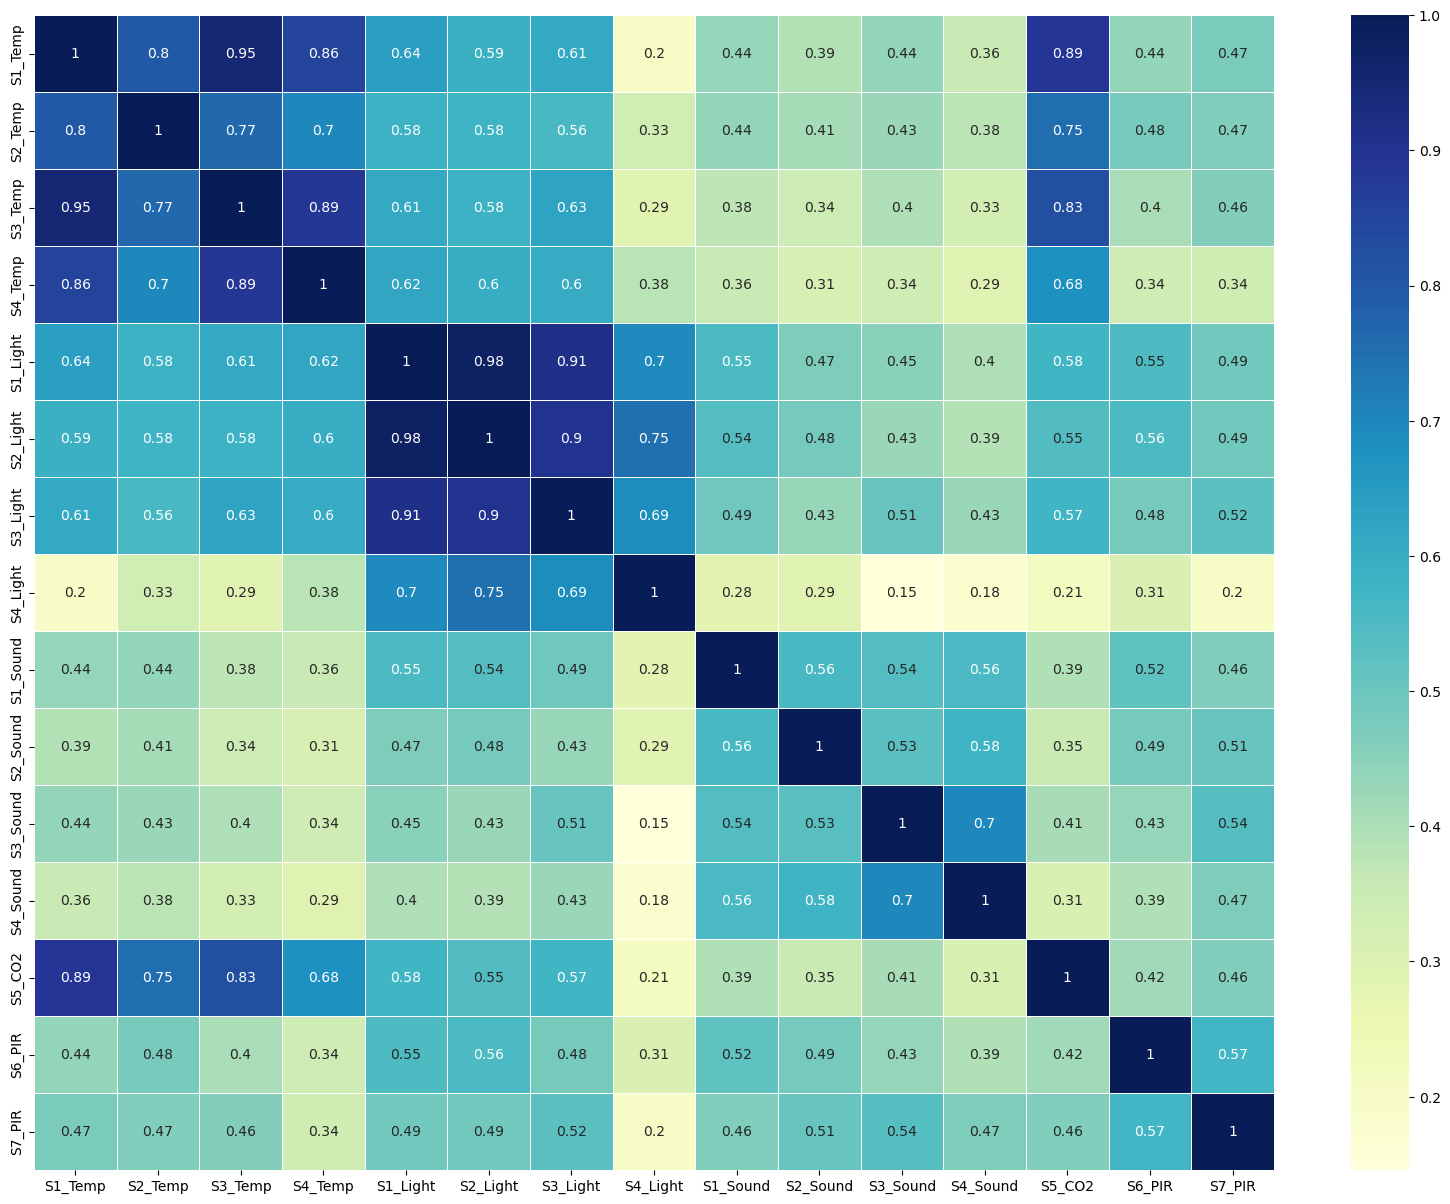

In [34]:
## DataFrame.corr(method='pearson', min_periods=1) 
## method = pearson,spearman, kendall 
## min_periods = Minimum number of observations required per pair of columns to have a valid result.
Ndata_corr = Ndata.corr(method='pearson', min_periods=1)

#plotting a heatmap 
%matplotlib inline
plt.figure(figsize=(20,15))
sns.heatmap(Ndata_corr, xticklabels = Ndata_corr.columns, yticklabels = Ndata_corr.columns, annot=True,
            linewidths=0.5, cmap = "YlGnBu")

Observations:
The strongest correlations are between the S1_Temp and S3_Temp variables with a correlation of 0.95.
Also, the correlation between S1_Light and S2_Light variables with a correlation of 0.98.

The weakest correlations are between the S5_CO2 and S4_Light variables with a correlation of 0.13.
Also, the correlation between S4_light and S3_Sound variables with a correlation of 0.15.


# Principal Component Analysis

In [35]:
# Compute the eigenvectors and eigenvalues in order to identify the principal components in the features data:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [8.22070858 1.81018435 1.55651142 0.71001096 0.54899852 0.01408419
 0.02550067 0.06942586 0.09677578 0.46665368 0.18408429 0.39138475
 0.26617381 0.32305397 0.31644916]
Eigen values Shape: (15,)
Eigen Vector Shape: (15, 15)


In [36]:
#Sort the eigenvalues and corresponding eigenvectors in descending order:

# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
 
# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]
 
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

# Compute the explained variance
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.54804724, 0.6687262 , 0.77249362, 0.81982769, 0.85642759,
       0.88753783, 0.91363015, 0.93516708, 0.95626369, 0.97400861,
       0.9862809 , 0.99273262, 0.99736101, 0.99906105, 1.        ])

In [37]:
# Determione the numebr of principal components:
n_components = np.argmax(explained_var >= 0.60) + 1
n_components

2

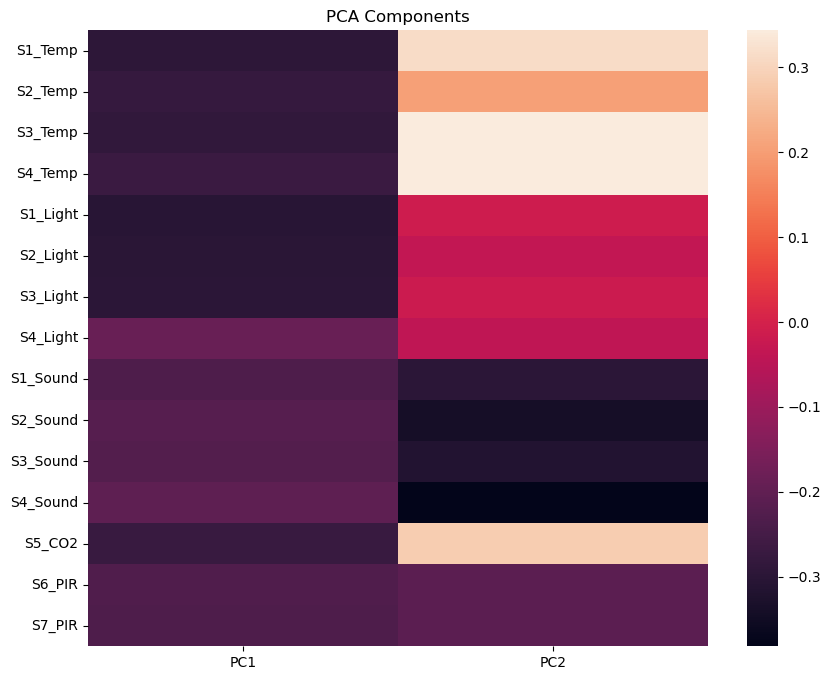

In [43]:
# Perform PCA:
P = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(P,
                             index = Ndata,
                             columns = ['PC1','PC2']
                            )
# Plot the heatmap:
plt.figure(figsize =(10, 8))
sns.heatmap(pca_component)
plt.title('PCA Components')
plt.show()

In [44]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
 
Z_pca = pd.DataFrame(Z_pca.values,columns = ['PCA1','PCA2'])
                            
Z_pca.head()

PCA1      PCA2
0  0.052974 -1.422401
1 -0.475830 -1.982209
2 -0.204272 -1.601382
3 -0.283496 -1.631697
4 -0.017027 -1.239046

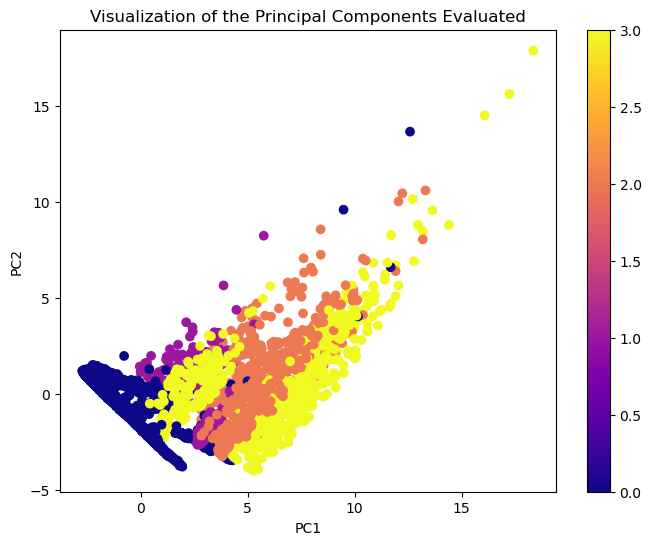

In [45]:
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)
 
# Create a dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=data['Room_Occupancy_Count'],
            cmap='plasma')
plt.colorbar() 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of the Principal Components Evaluated')
plt.show()

# Feature Selection

In [46]:
# Perform feature selection
from sklearn.feature_selection import f_classif

Ndata= ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
        'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
        'S5_CO2', 'S6_PIR', 'S7_PIR']

X = data[Ndata]
y = data['Room_Occupancy_Count']
f_scores, p_values = f_classif(X, y)

# Print the feature importance scores
feature_importance = pd.DataFrame({'Variable': Ndata, 'F-Score': f_scores, 'P-value': p_values})
feature_importance = feature_importance.sort_values('F-Score', ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
    Variable       F-Score  P-value
4   S1_Light  22393.540766      0.0
6   S3_Light   6092.518217      0.0
5   S2_Light   5862.045971      0.0
0    S1_Temp   3515.133276      0.0
14    S7_PIR   3392.170690      0.0
1    S2_Temp   2774.965503      0.0
12    S5_CO2   2689.758723      0.0
2    S3_Temp   2516.239838      0.0
13    S6_PIR   2436.538045      0.0
8   S1_Sound   1987.382225      0.0
9   S2_Sound   1762.256261      0.0
3    S4_Temp   1485.635887      0.0
10  S3_Sound   1413.485168      0.0
11  S4_Sound    988.831331      0.0
7   S4_Light    785.911760      0.0


In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Perform feature selection 
selector = SelectKBest(score_func=f_classif, k=10)  # Select the top 10 features out of 15
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Create a new DataFrame with the selected features
selected_data = data[selected_features]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S1_Sound', 'S5_CO2', 'S6_PIR', 'S7_PIR'],
      dtype='object')


In [49]:
selected_data

S1_Temp  S2_Temp  S3_Temp  S1_Light  S2_Light  S3_Light  S1_Sound  \
0        24.94    24.75    24.56       121        34        53      0.08   
1        24.94    24.75    24.56       121        33        53      0.93   
2        25.00    24.75    24.50       121        34        53      0.43   
3        25.00    24.75    24.56       121        34        53      0.41   
4        25.00    24.75    24.56       121        34        54      0.18   
...        ...      ...      ...       ...       ...       ...       ...   
10124    25.06    25.13    24.69         6         7        33      0.09   
10125    25.06    25.06    24.69         6         7        34      0.07   
10126    25.13    25.06    24.69         6         7        34      0.11   
10127    25.13    25.06    24.69         6         7        34      0.08   
10128    25.13    25.06    24.69         6         7        34      0.08   

       S5_CO2  S6_PIR  S7_PIR  
0         390       0       0  
1         390       0       0  
2         390       0       0  
3         390       0       0  
4         390       0       0  
...       ...     ...     ...  
10124     345       0       0  
10125     345       0       0  
10126     345       0       0  
10127     345       0       0  
10128     345       0       0  

[10129 rows x 10 columns]

# Spliting and Scaling the Data for Model Training

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Split the data into training and testing set

# The features selected is set as X while the target variable is y:
X = selected_data
y = data['Room_Occupancy_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the train and test data
scale = RobustScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8103, 10) (8103,)
(2026, 10) (2026,)


# Model Training

Decision Tree Classifier

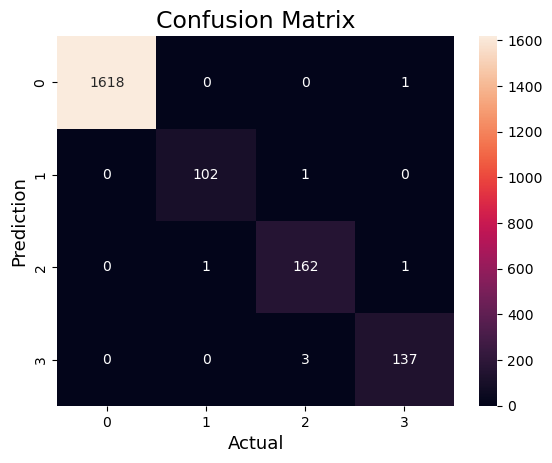

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Fit the model:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train,y_train)

# Make prediction on the testing data:
t_prediction = dtree_clf.predict(X_test)

# Compute the confusion matrix:
cm = confusion_matrix(y_test,t_prediction)
 
# Plot the confusion matrix:
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

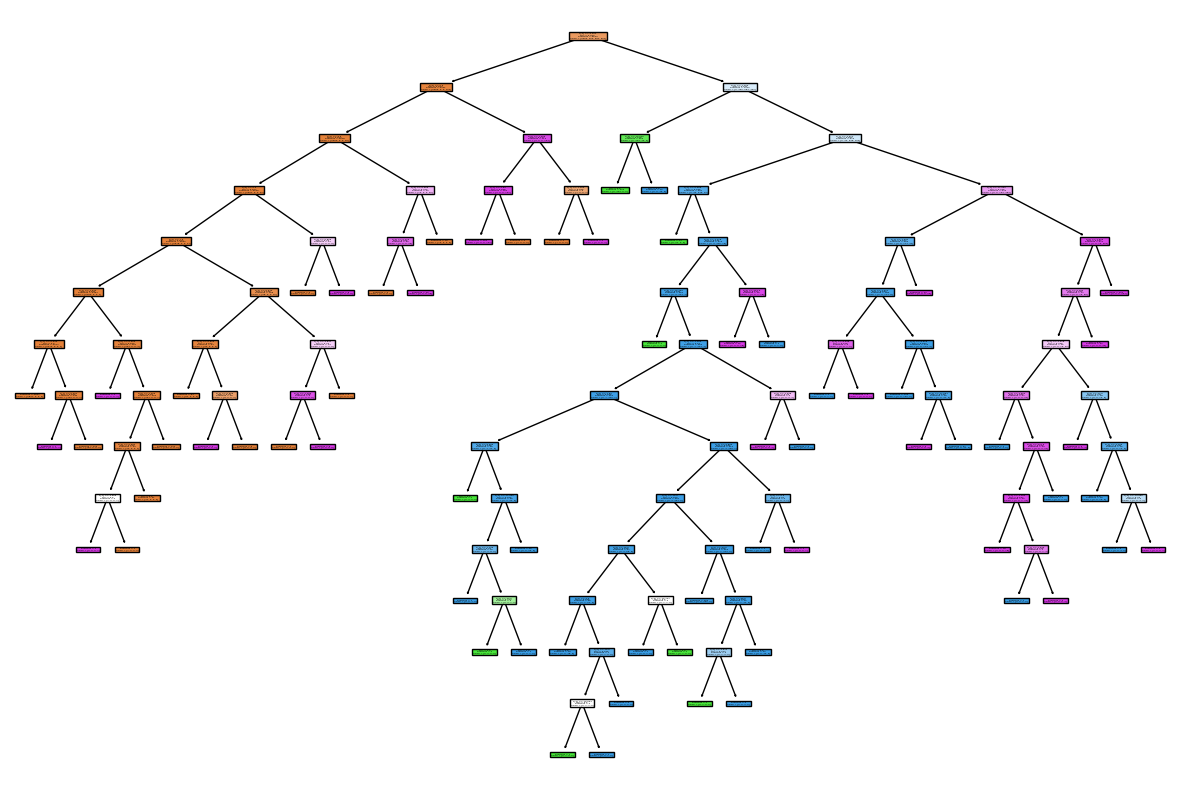

In [54]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dtree_clf, filled=True)
plt.show()

In [55]:
# Estimate the features importance:
column_names = X.columns
## feature importance
feature_importances = pd.DataFrame(dtree_clf.feature_importances_, index = column_names, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False).head(10)

Importance
S1_Light    0.590567
S3_Light    0.122185
S5_CO2      0.081876
S2_Light    0.072702
S7_PIR      0.071416
S2_Temp     0.023991
S1_Sound    0.017103
S3_Temp     0.008698
S1_Temp     0.008000
S6_PIR      0.003460

In [57]:
# Calculate the evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
accuracy = accuracy_score(y_test, t_prediction)
precision = precision_score(y_test, t_prediction, average='macro')
recall = recall_score(y_test, t_prediction, average='macro')
f1 = f1_score(y_test, t_prediction, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9965449160908193
Precision: 0.9879515968462802
Recall: 0.9890124758826709
F1-score: 0.9884698422452318


Random Forest Classifier

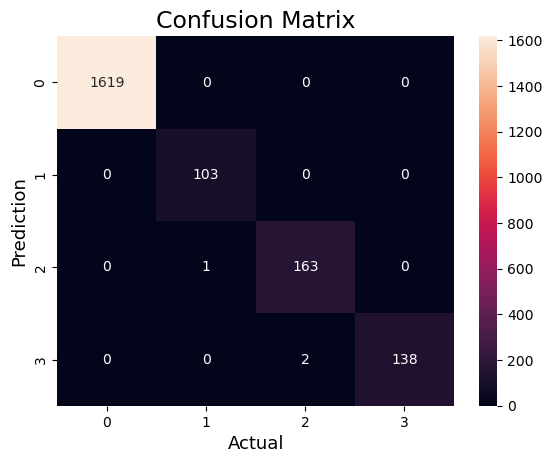

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data:
t_prediction =  clf.predict(X_test)

# Compute the confusion matrix:
cm = confusion_matrix(y_test,t_prediction)
 
# Plot the confusion matrix:
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [59]:
# Calculate the evaluation metrices
accuracy = accuracy_score(y_test, t_prediction)
precision = precision_score(y_test, t_prediction, average='macro')
recall = recall_score(y_test, t_prediction, average='macro')
f1 = f1_score(y_test, t_prediction, average='macro')

# Print the evaluation metrices
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9985192497532083
Precision: 0.9945658508158508
Recall: 0.9949041811846691
F1-score: 0.9947140741219631


K-Nearest Neighbors(KNN)

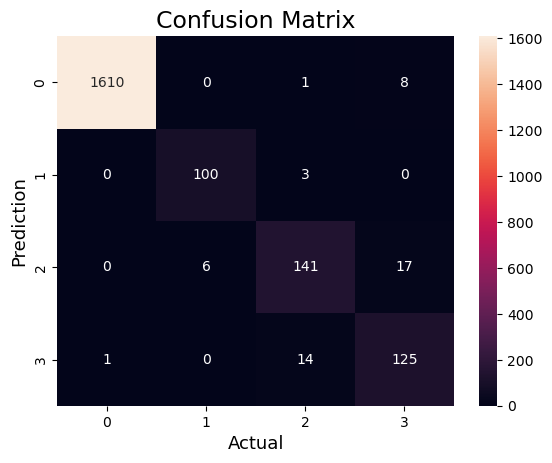

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make prediction on the testing data:
t_prediction =  knn.predict(X_test)

# Compute the confusion matrix:
cm = confusion_matrix(y_test,t_prediction)
 
# Plot the confusion matrix:
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

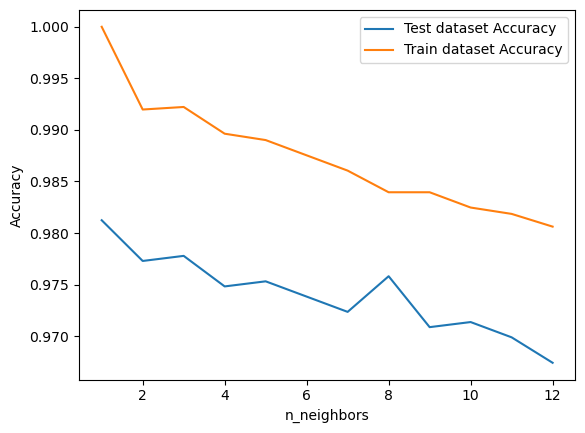

In [61]:
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
# Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Test dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [62]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, t_prediction)
precision = precision_score(y_test, t_prediction, average='macro')
recall = recall_score(y_test, t_prediction, average='macro')
f1 = f1_score(y_test, t_prediction, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9753208292201382
Precision: 0.9157253200285772
Recall: 0.9294820099492138
F1-score: 0.9222439512019953


Support Vector Machine (Linear SVC)

C:\Users\Korede\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


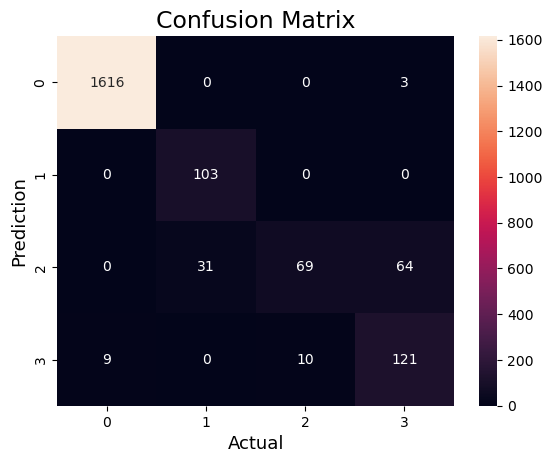

In [63]:
from sklearn.svm import LinearSVC

# Fit the model:
lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)

# Make prediction on the testing data:
t_prediction = lin_svc.predict(X_test)

# Compute the confusion matrix:
cm = confusion_matrix(y_test,t_prediction)
 
# Plot the confusion matrix:
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [64]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, t_prediction)
precision = precision_score(y_test, t_prediction, average='macro')
recall = recall_score(y_test, t_prediction, average='macro')
f1 = f1_score(y_test, t_prediction, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9422507403751234
Precision: 0.8200382494187579
Recall: 0.820791106481611
F1-score: 0.7928013219962261


# Model Evaluation

In [65]:
# To compare the evaluation matrices of the models:
models = [("RandomForest",RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),   
    ("KNNeighbors", KNeighborsClassifier()),
    ("LinearSVC", LinearSVC()),
]

# Initialize an empty dictionary to store the evaluation results
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

# Evaluate each model and store the results
for model_name, model in models:
    model.fit(X_train, y_train)
    t_prediction = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, t_prediction)
    precision = precision_score(y_test, t_prediction, average='macro')
    recall = recall_score(y_test, t_prediction, average='macro')
    f1 = f1_score(y_test, t_prediction, average='macro')
    
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

# Create a DataFrame of the results
df_results = pd.DataFrame(results)

print(df_results)

           Model  Accuracy  Precision    Recall  F1-Score
0   RandomForest  0.999013   0.996072  0.996690  0.996372
1  Decision Tree  0.996545   0.987068  0.989915  0.988465
2    KNNeighbors  0.975321   0.915725  0.929482  0.922244
3      LinearSVC  0.959033   0.887793  0.859554  0.859730


C:\Users\Korede\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
From the results, the Random Forest Classifier has the highest matrices so I fit it in the original dataset, to train it, 
get the confusion matrix.

(8103, 15) (8103,)
(2026, 15) (2026,)


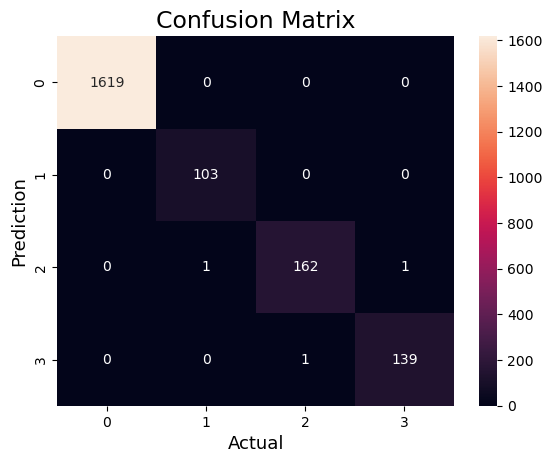

In [73]:
# Split the original data into training and testing set

# The features selected is set as X while the target variable is y:
X = data.drop('Room_Occupancy_Count', axis = 1)
y = data['Room_Occupancy_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the train and test data
scale = RobustScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Fit the model:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data:
t_prediction =  clf.predict(X_test)

# Compute the confusion matrix:
cm = confusion_matrix(y_test,t_prediction)
 
# Plot the confusion matrix:
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()